In [2]:
import pandas as pd

In [2]:
# df = pd.read_parquet("1200k_processed_gathered_steps.gzip")
# def removemultispace(s):
#     return " ".join(s.split())
# df['sentences'] = df['sentences'].apply(removemultispace)
# df = df[df['sentences'].apply(lambda x: len(str(x).split())) <= 400]
# df.to_parquet("steps400w1200k_t.gzip", compression="gzip")

In [3]:
df = pd.read_parquet("1200k_processed_gathered_steps.gzip")

In [9]:
# df
df.iloc[0][0]

'In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine. Stir over medium heat until mixture bubbles all over top. Boil and stir [MASK] minutes more. Take off heat. Stir in vanilla and cereal; mix well. Using 2 teaspoons, drop and shape into 30 clusters on wax paper. Let stand until firm, about [MASK] minutes.'

In [4]:
df_save = df.sample(500000, ignore_index=True)

In [11]:
df_save.to_parquet('steps400w500k_t.gzip', compression='gzip')

In [5]:
df_save100k = df.sample(100000, ignore_index=True)
# df_save100k.to_parquet('steps400w100k_t.gzip', compression='gzip')


<Axes: ylabel='Frequency'>

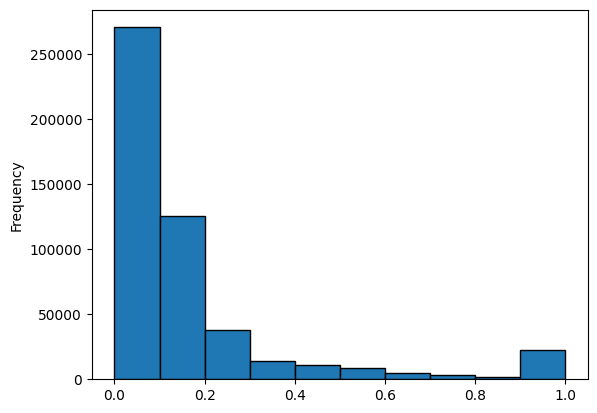

In [6]:
df_save['minute_target'].plot(kind='hist', edgecolor='black')
# df_save

<Axes: ylabel='Frequency'>

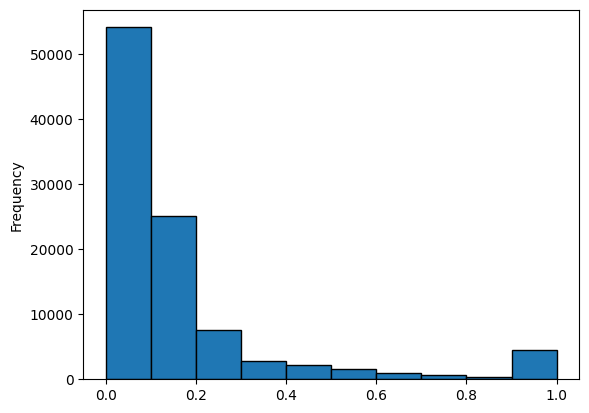

In [7]:
df_save100k['minute_target'].plot(kind='hist', edgecolor='black')

In [8]:
dfold = pd.read_parquet('steps400w100000t.gzip')

<Axes: ylabel='Frequency'>

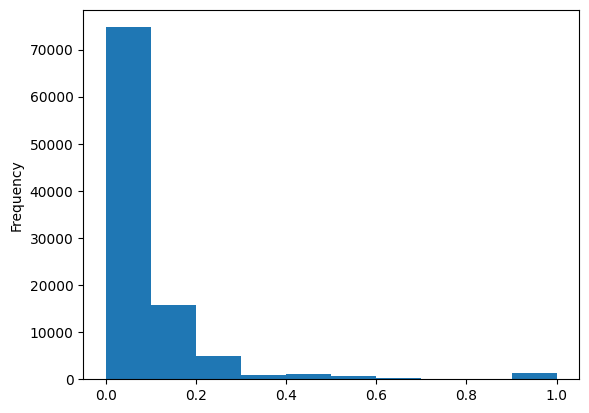

In [9]:
dfold['minute_target'].plot(kind='hist')

In [50]:
dfold.iloc[0][0]

'In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine. Stir over medium heat until mixture bubbles all over top. Boil and stir [MASK] minutes more. Take off heat. Stir in vanilla and cereal; mix well. Using 2 teaspoons, drop and shape into 30 clusters on wax paper. Let stand until firm, about [MASK] minutes.'

In [20]:
cuts = [round(i*0.1,1) for i in range(0,11)]
labels = [round(i*0.1,1) for i in range(1,11)]
df['cut'] = pd.cut(df['minute_target'],cuts,labels=labels)

In [34]:
# df['cut'].plot(kind='hist', edgecolor='black')
import numpy as np
# print(df['cut'].iloc[1191960]==np.nan)
newdf = df[df['cut'] != np.NaN]


In [38]:
df

,sentences,target,minute_target,tag,cut
0,"In a heavy 2-quart saucepan, mix brown sugar, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.08750,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.1
1,Place chipped beef on bottom of baking dish. P...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.45000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.5
2,"In a slow cooker, combine all ingredients. Cov...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.60000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, ...",0.6
3,Boil and debone chicken. Put bite size pieces ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.05000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.1
4,Combine first 4 ingredients and press in 13 x ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.05000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.1
...,...,...,...,...,...
1191958,"In blender container, puree all ingredients. M...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.01250,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.1
1191959,"In a small sauce pan, melt butter and add flou...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, ...",0.1
1191960,"For the cucumber salad, mix the vinegar and su...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN
1191961,2. Beat egg white with evaporated skim milk. P...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.10000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.1


In [55]:
newdf = newdf.dropna()
gdf = newdf.groupby('cut')
gdf.size()

cut
0.1    641360
0.2    280594
0.3     83283
0.4     33909
0.5     25089
0.6     19071
0.7     11057
0.8      8680
0.9      7053
1.0     50816
dtype: int64

In [65]:
df1 = gdf.get_group(0.1)
df2 = pd.concat([gdf.get_group(i) for i in [round(i*0.1,1) for i in range(2,11)]])

In [66]:
df3 = pd.concat([df1.sample(75000),df2.sample(25000)])

<Axes: ylabel='Frequency'>

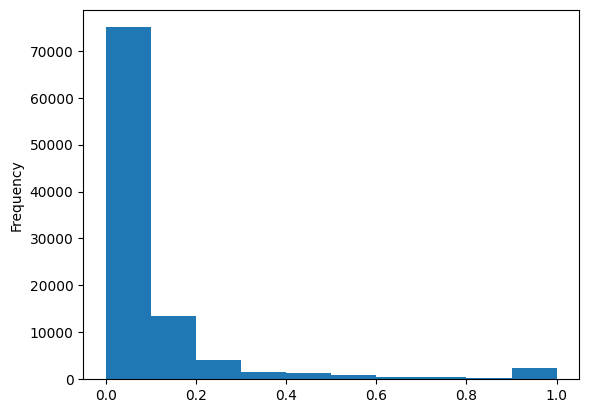

In [70]:
df3 = df3.reset_index(drop=True)
df3['minute_target'].plot(kind='hist')